Decision Tree Accuracy: 92.98%
Confusion Matrix:
 [[68  4]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



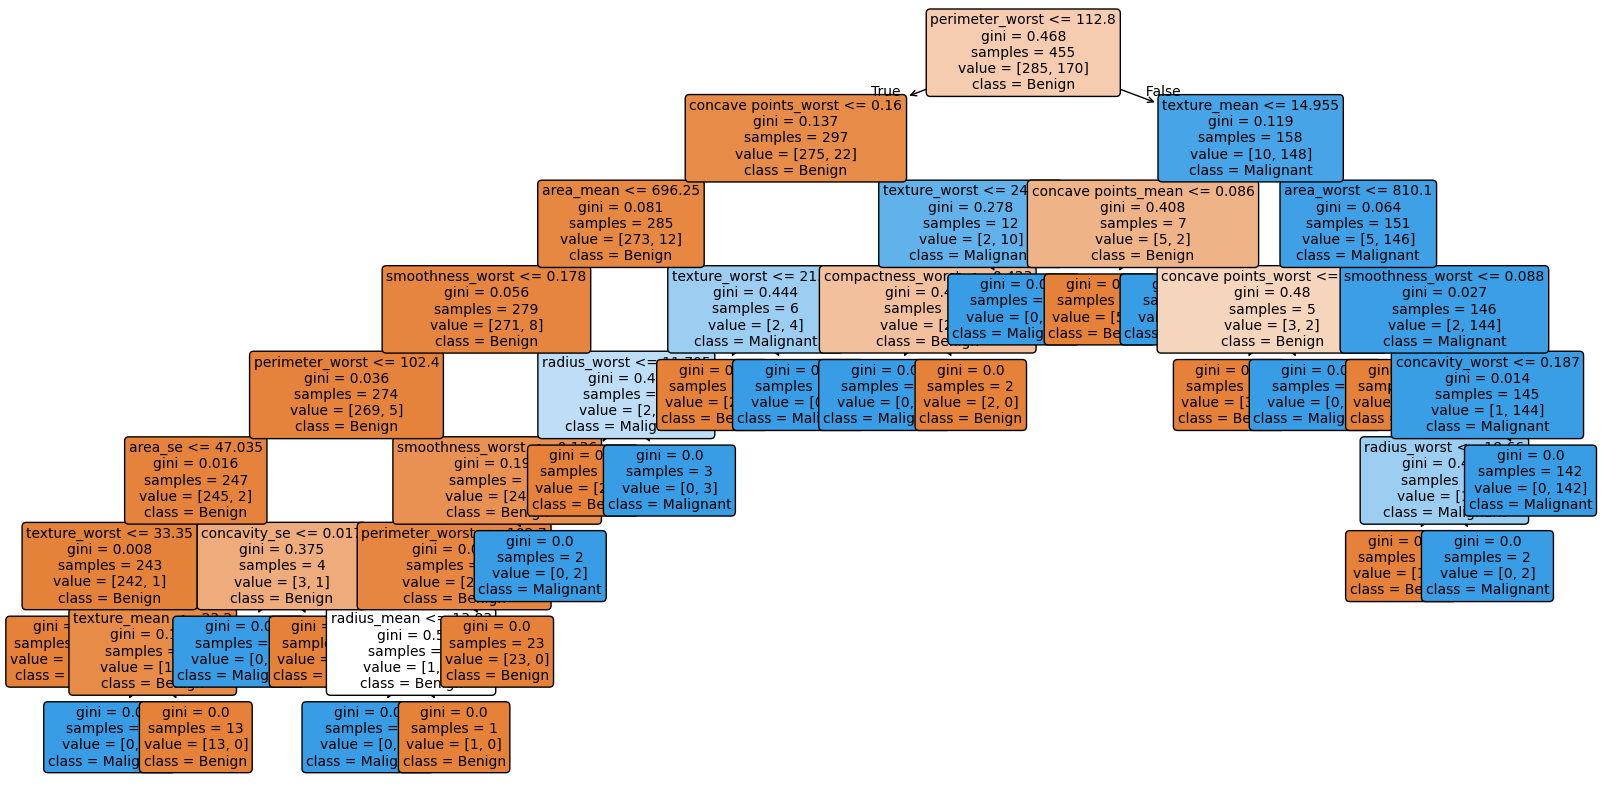

In [1]:
# Ex No: 11 - Decision Tree Classification for Breast Cancer

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Load dataset
CSV_PATH = '/content/data.csv'  # replace with your path
df = pd.read_csv(CSV_PATH)

# Step 2: Drop ID column and any unnamed/empty columns
if 'id' in df.columns:
    df = df.drop(columns=['id'])
df = df.dropna(axis=1, how='all')

# Step 3: Convert target to numeric: 'M' -> 1, 'B' -> 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 4: Separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Step 5: Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Step 6: Fill missing values with column mean
X = X.fillna(X.mean())

# Step 7: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 9: Predict on test set
y_pred = dt_model.predict(X_test)

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Step 11: Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Benign', 'Malignant'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
